In [22]:
import pandas as pd
import numpy as np

import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer

from sklearn.compose import ColumnTransformer

In [6]:
df = pd.read_csv("train.csv", usecols= ['Age', 'Fare', 'Survived'])

In [7]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [8]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [9]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['Survived']), df['Survived'], test_size=0.2, random_state=42)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Age QQplot')

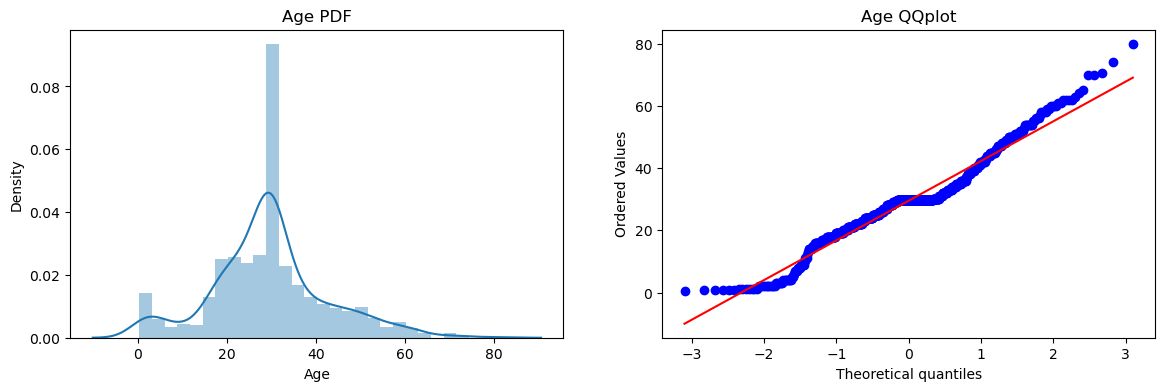

In [14]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Age'])
plt.title("Age PDF")

plt.subplot(122)
stats.probplot(X_train['Age'], dist='norm', plot=plt)
plt.title("Age QQplot")

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Age QQplot')

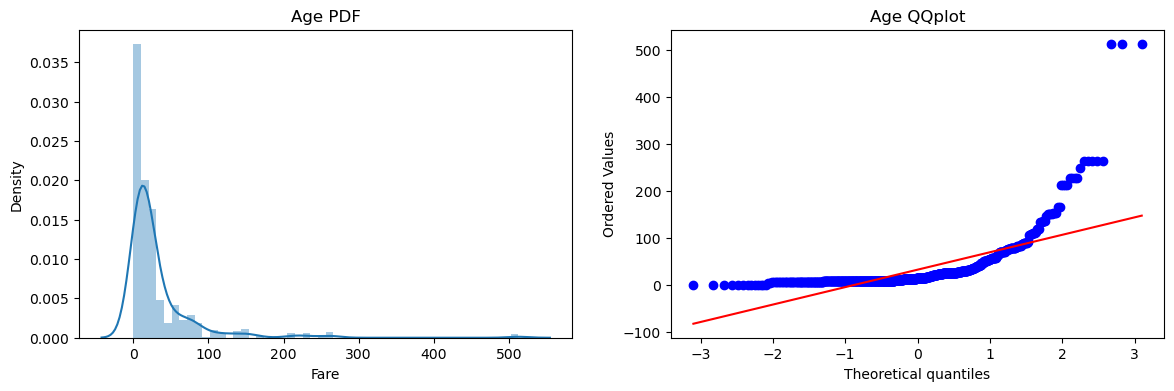

In [15]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Fare'])
plt.title("Age PDF")

plt.subplot(122)
stats.probplot(X_train['Fare'], dist='norm', plot=plt)
plt.title("Age QQplot")

In [16]:
clf= LogisticRegression()
clf2= DecisionTreeClassifier()

In [19]:
clf.fit(X_train, y_train)
clf2.fit(X_train, y_train)

y_pred=clf.predict(X_test)
y_pred1=clf2.predict(X_test)

print('Accuray LR', accuracy_score(y_test, y_pred))
print('Accuray DT', accuracy_score(y_test, y_pred1))

Accuray LR 0.6480446927374302
Accuray DT 0.6815642458100558


In [32]:
trf= FunctionTransformer(func=np.log1p)

X_train_transformed= trf.fit_transform(X_train)
X_test_transformed= trf.transform(X_test)

In [33]:
clf= LogisticRegression()
clf2= DecisionTreeClassifier()

clf.fit(X_train_transformed, y_train)
clf2.fit(X_train_transformed, y_train)

y_pred=clf.predict(X_test_transformed)
y_pred1=clf2.predict(X_test_transformed)

print('Accuray LR', accuracy_score(y_test, y_pred))
print('Accuray DT', accuracy_score(y_test, y_pred1))

Accuray LR 0.6815642458100558
Accuray DT 0.6759776536312849


C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Age QQplot')

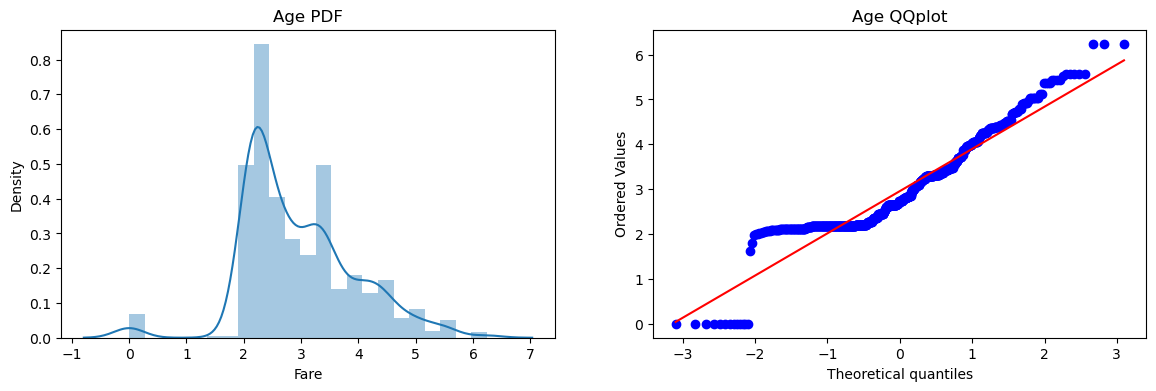

In [34]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train_transformed['Fare'])
plt.title("Age PDF")

plt.subplot(122)
stats.probplot(X_train_transformed['Fare'], dist='norm', plot=plt)
plt.title("Age QQplot")


Text(0.5, 1.0, 'Age QQplot')

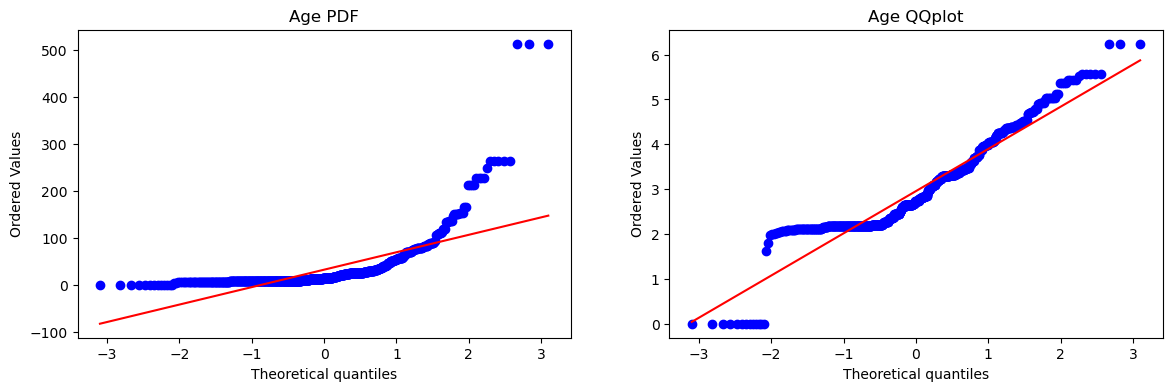

In [35]:
plt.figure(figsize=(14,4))
plt.subplot(121)
stats.probplot(X_train['Fare'], dist='norm', plot=plt)
plt.title("Age PDF")

plt.subplot(122)
stats.probplot(X_train_transformed['Fare'], dist='norm', plot=plt)
plt.title("Age QQplot")


Text(0.5, 1.0, 'Age QQplot')

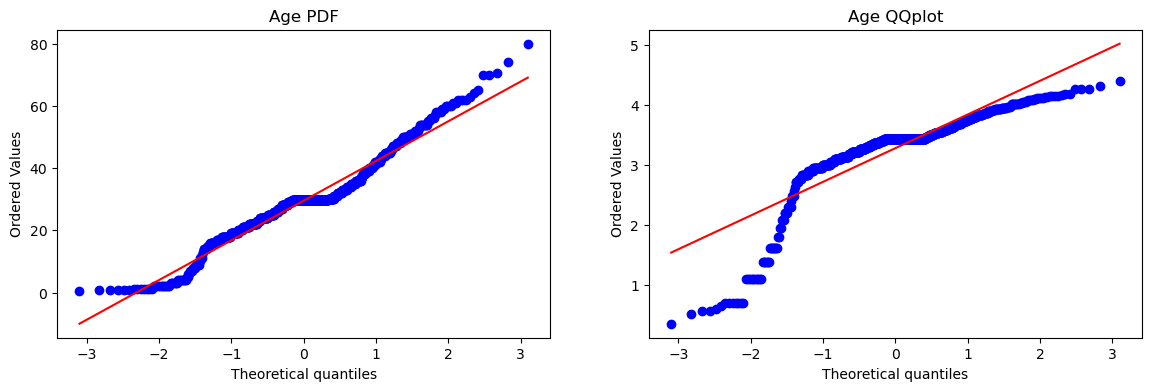

In [36]:
plt.figure(figsize=(14,4))
plt.subplot(121)
stats.probplot(X_train['Age'], dist='norm', plot=plt)
plt.title("Age PDF")

plt.subplot(122)
stats.probplot(X_train_transformed['Age'], dist='norm', plot=plt)
plt.title("Age QQplot")


In [37]:
trf2= ColumnTransformer([('log', FunctionTransformer(np.log1p), ['Fare'])], 
                      remainder='passthrough')

In [38]:
X_train_transformed2=trf2.fit_transform(X_train)
X_test_transformed2=trf2.transform(X_test)

In [40]:
clf= LogisticRegression()
clf2= DecisionTreeClassifier()

clf.fit(X_train_transformed2, y_train)
clf2.fit(X_train_transformed2, y_train)

y_pred=clf.predict(X_test_transformed2)
y_pred2=clf2.predict(X_test_transformed2)

print('Accuray LR', accuracy_score(y_test, y_pred))
print('Accuray DT', accuracy_score(y_test, y_pred2))

Accuray LR 0.6703910614525139
Accuray DT 0.6703910614525139


In [43]:
#X_transformed2= trf2.fit_transform(X)

clf= LogisticRegression()
clf2= DecisionTreeClassifier()

print("LR" , np.mean(cross_val_score(clf, X_train_transformed2, y_train, cv=5, scoring='accuracy')))
print("DT", np.mean(cross_val_score(clf2, X_train_transformed2,y_train, scoring='accuracy', cv=10)))

LR 0.6684132768639811
DT 0.6193857589984351


In [49]:
def apply_transform(transform):
    X=df.iloc[:, 1:3]
    y=df.iloc[:,0]
    
    trf= ColumnTransformer([('log', FunctionTransformer(transform), ['Fare'])], 
                      remainder='passthrough')
    
    X_trans = trf.fit_transform(X)
    
    clf = LogisticRegression()
    
    print("Accuracy" , np.mean(cross_val_score(clf, X_trans, y, cv=10, scoring='accuracy')))
    
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    stats.probplot(X['Fare'], dist='norm', plot=plt)
    plt.title("Before Transformer")

    plt.subplot(122)
    stats.probplot(X_trans[:, 0], dist='norm', plot=plt)
    plt.title("After Transformer")

Accuracy 0.6611485642946316


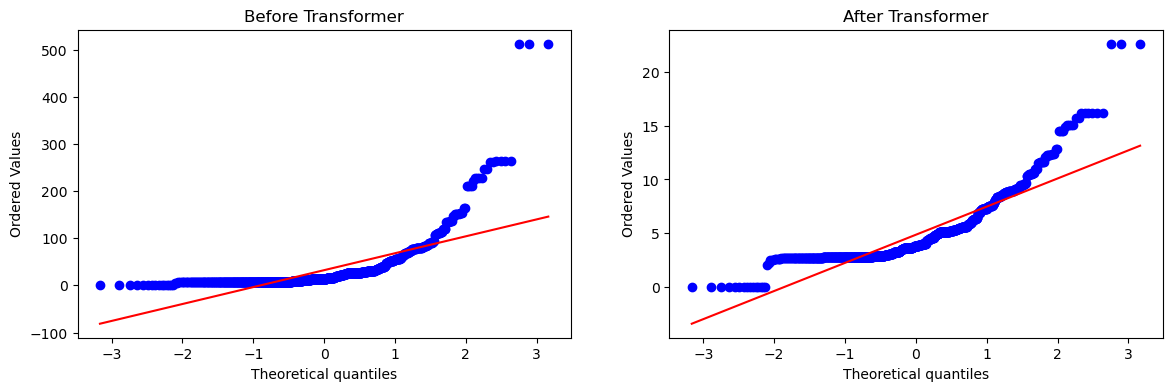

In [54]:
apply_transform(np.sqrt)